# House Price Prediction Model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load and examine the data 
df = pd.read_excel("D:\\ml-learning-journey\\01_fundamentals\\basics\\Rent.xlsx")

print("Data shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())

Data shape: (60, 2)

First 5 rows:
   area   rent
0  2000  31500
1  2100  35000
2  2500  41050
3  2250  36100
4  3000  52100

Missing values:
area    0
rent    0
dtype: int64

Basic statistics:
              area          rent
count    60.000000     60.000000
mean   2289.000000  37269.166667
std     538.880509  11770.736234
min    1200.000000  20000.000000
25%    1900.000000  31000.000000
50%    2130.000000  34450.000000
75%    2700.000000  47625.000000
max    3500.000000  70500.000000


Features shape: (60, 1)
Target shape: (60,)
Feature columns: ['area']


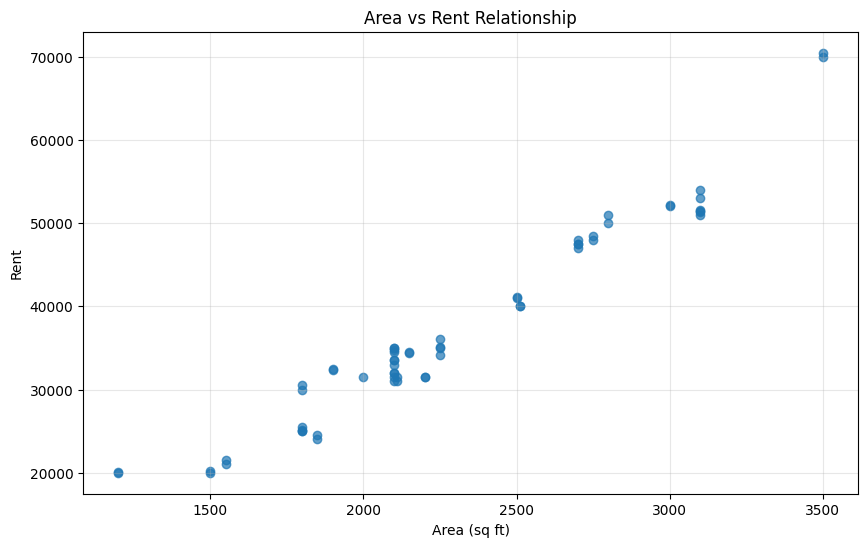

In [4]:
X = df[['area']]  # Features: only the area column
y = df['rent']    # Target: only the rent column

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X['area'], y, alpha=0.7)
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent')
plt.title('Area vs Rent Relationship')
plt.grid(True, alpha=0.3)
plt.show()



In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Training set: 48 samples (80.0%)
Test set: 12 samples (20.0%)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")
print(f"Model coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model intercept: {model.intercept_:.2f}")

Model trained successfully!
Model coefficient (slope): 11790.90
Model intercept: 38097.92


In [8]:
# Make predictions
y_pred = model.predict(X_test_scaled)

print(f"Predictions made for {len(y_pred)} test samples")

Predictions made for 12 test samples


In [9]:

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=" * 50)
print("MODEL PERFORMANCE (REGRESSION METRICS)")
print("=" * 50)
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"R² Score (%): {r2 * 100:.2f}%")

# Interpretation
print("\n" + "=" * 50)
print("INTERPRETATION:")
print("=" * 50)
if r2 > 0.8:
    print("EXCELLENT: Model explains >80% of variance")
elif r2 > 0.6:
    print("GOOD: Model explains >60% of variance")
elif r2 > 0.4:
    print(" FAIR: Model explains >40% of variance")
else:
    print(" POOR: Model explains <40% of variance")

print(f"On average, predictions are off by ±{mae:,.0f} rent units")

MODEL PERFORMANCE (REGRESSION METRICS)
Mean Squared Error (MSE): 5,199,691.62
Root Mean Squared Error (RMSE): 2,280.28
Mean Absolute Error (MAE): 1,984.63
R² Score: 0.9371
R² Score (%): 93.71%

INTERPRETATION:
EXCELLENT: Model explains >80% of variance
On average, predictions are off by ±1,985 rent units


In [10]:
# Show sample predictions vs actual
comparison_df = pd.DataFrame({
    'Area': X_test.values[:10].flatten(),
    'Actual_Rent': y_test.values[:10],
    'Predicted_Rent': y_pred[:10].round(0),
    'Difference': (y_test.values[:10] - y_pred[:10]).round(0)
})

print("First 10 Predictions:")
print(comparison_df)

First 10 Predictions:
   Area  Actual_Rent  Predicted_Rent  Difference
0  2000        31500         31083.0       417.0
1  1900        32500         28935.0      3565.0
2  1500        20200         20340.0      -140.0
3  3100        51000         54719.0     -3719.0
4  2510        40050         42042.0     -1992.0
5  2800        51000         48273.0      2727.0
6  2250        35100         36455.0     -1355.0
7  1800        25500         26786.0     -1286.0
8  2100        34500         33232.0      1268.0
9  1800        25100         26786.0     -1686.0


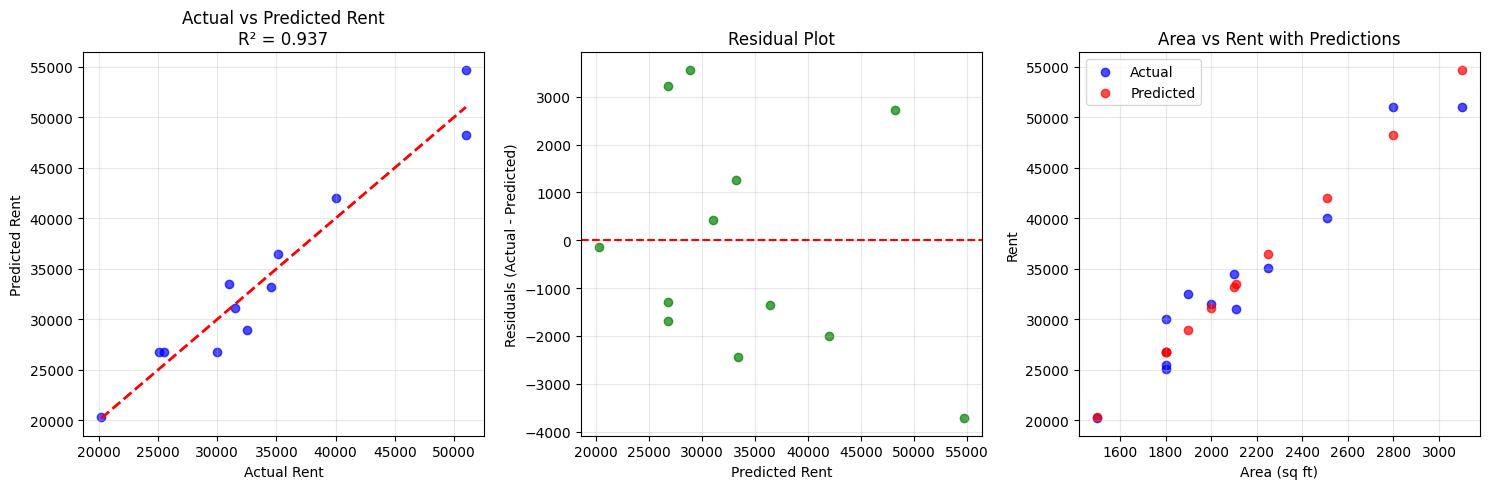

In [11]:
# Visualize results
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title(f'Actual vs Predicted Rent\nR² = {r2:.3f}')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rent')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 3: Original data with regression line
plt.subplot(1, 3, 3)
plt.scatter(X_test['area'], y_test, alpha=0.7, label='Actual', color='blue')
plt.scatter(X_test['area'], y_pred, alpha=0.7, label='Predicted', color='red')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent')
plt.title('Area vs Rent with Predictions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Make a prediction for new data
print("Example predictions for new areas:")
print("=" * 40)

new_areas = [1500, 2000, 2500, 3000, 3500]
for area in new_areas:
    area_scaled = scaler.transform([[area]])
    predicted_rent = model.predict(area_scaled)[0]
    print(f"Area: {area:4d} sq ft → Predicted Rent: {predicted_rent:6,.0f}")

Example predictions for new areas:
Area: 1500 sq ft → Predicted Rent: 20,340
Area: 2000 sq ft → Predicted Rent: 31,083
Area: 2500 sq ft → Predicted Rent: 41,827
Area: 3000 sq ft → Predicted Rent: 52,570
Area: 3500 sq ft → Predicted Rent: 63,314
